# Signal

In this notebook we measure the signal quality of the signal source and signal source with amplifier.

In [53]:
import os
import control
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

os.makedirs('../dataset/signal', exist_ok=True)

scope = control.MSOX6004A('172.22.22.30')
scope.holla()

'AGILENT TECHNOLOGIES,MSO-X 4054A,MY57310545,07.20.2017102615\n'

The oscilloscope is not able to resolve the sine shape at sweep duration in the millisecond range which makes any frequency analysis very hard, thus we reduce the sweep duration to microseconds. The resolution is then high enough to clearly distinguish the period but still not too far to our target duration of 26.84ms.

## Source

In [14]:
control.aod_h(frequency=[90e6, 110e6], duration=10e-6, amplitude=np.ones(1024), nodwells=[False, True])

df = scope.capture()
df.to_hdf('../dataset/signal/source.h5', 'horizontal', complevel=9)

We save the data to a compressed HDF5 file for faster io and reduced disk footprint compared to CSV.

Now we need to change the signal source to measure the other DDS output.

In [15]:
control.aod_v(frequency=[90e6, 110e6], duration=10e-6, amplitude=np.ones(1024), nodwells=[False, True])

df = scope.capture()
df.to_hdf('../dataset/signal/source.h5', 'vertical', complevel=9)

## Amplifier

Next we feed the DDS signal into the amplifier and connect the amplifier output **with attentuator** to the oscilloscope. The attentuators are necessary to shield the oscilloscope from too much power. We used a sequence of attentuators with total damping of 30dBm. For longer measurements it is recommend to have the attentuators increase with damping power to avoid heating of the first attentuator. 

In [22]:
control.aod_h(frequency=[90e6, 110e6], duration=10e-6, amplitude=np.ones(1024), nodwells=[False, True])

df = scope.capture()
df.to_hdf('../dataset/signal/amplifier.h5', 'horizontal', complevel=9)

Again change the cables and connect the second DDS with second amplifier to the oscilloscope. Do not forget to power down the amplifier when not in use!

In [24]:
control.aod_v(frequency=[90e6, 110e6], duration=10e-6, amplitude=np.ones(1024), nodwells=[False, True])

df = scope.capture()
df.to_hdf('../dataset/signal/amplifier.h5', 'vertical', complevel=9)

## Intensity Control

Now we will conduct a long time measurement to estimate the quality of the intensity control.

In [ ]:
def timestamp():
    return datetime.now().strftime('%Y-%m-%d_%H%M%S')

In the first run we measure about every 130s over night.

In [ ]:
time = []
voltage = []

while True:
    scope.single()
    
    sleep(5)
    
    control.trigger()
    
    sleep(5)
    
    t = timestamp()
    U = scope.data(1).voltage.mean()
    
    time.append(t)
    voltage.append(U)
    
    print(f'measured {U}V at {t}')
    
    sleep(120)
    
df = pd.DataFrame({ 'time': times, 'voltage': voltages })
df.to_hdf('control.h5', 'long')

In the second run we measure every 10s. This is in particular interesting as it tells us how much intensity fluctuates during intensity measurements that take minutes.

In [ ]:
time = []
voltage = []

while True:
    scope.single()
    
    sleep(5)
    
    control.trigger()
    
    sleep(5)
    
    t = timestamp()
    U = scope.data(1).voltage.mean()
    
    time.append(t)
    voltage.append(U)
    
    print(f'measured {U}V at {t}')
    
df = pd.DataFrame({ 'time': times, 'voltage': voltages })
df.to_hdf('control.h5', 'short')

In [63]:
control.aod_h(frequency=[80e6, 120e6], duration=1e-3, amplitude=np.ones(1024), nodwells=[False, True])

df = scope.capture()
df.to_hdf('../dataset/signal/source.h5', 'horizontal', complevel=9)

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

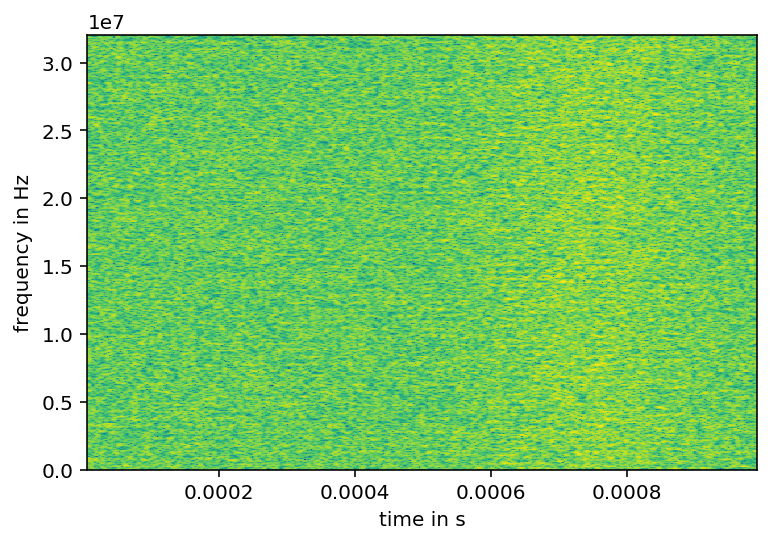

In [62]:
plt.specgram(df.voltage, NFFT=1024, Fs=1/(df.time[1]-df.time[0]), noverlap=900)
plt.xlabel('time in s')
plt.ylabel('frequency in Hz')
plt.show()

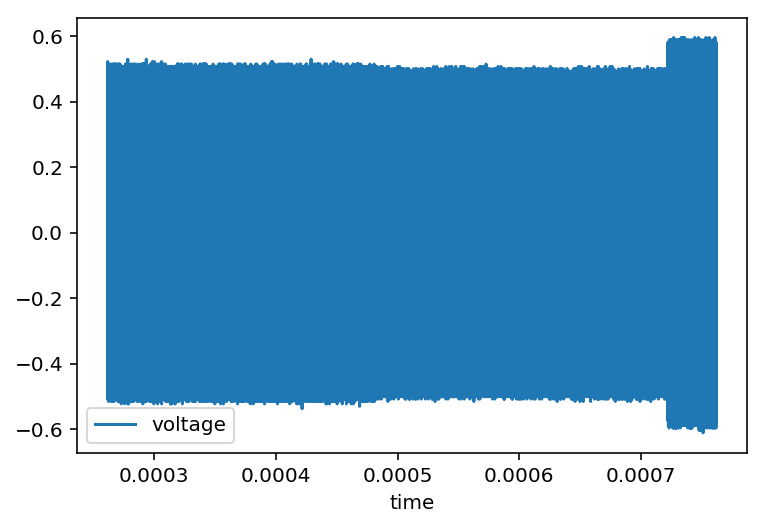

In [52]:
df.plot('time', 'voltage')

In [69]:
scope.capture()

,time,voltage
0,-2.500000e-08,0.063515
1,-2.492187e-08,0.097113
2,-2.484375e-08,0.129791
3,-2.476563e-08,0.162008
4,-2.468750e-08,0.193305
5,-2.460938e-08,0.224142
6,-2.453125e-08,0.254519
7,-2.445313e-08,0.283975
8,-2.437500e-08,0.312510
9,-2.429688e-08,0.340586
